<a href="https://colab.research.google.com/github/sanmevv/Turkey-Earthquake-NLP-ML/blob/main/Preprocessing2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q -U --pre pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 KB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 KB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 KB 3.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
from collections import Counter
import re

from sklearn.model_selection import train_test_split

from pycaret.classification import *

from imblearn.over_sampling import SMOTE

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/final.csv')

In [5]:
data.head()

,Unnamed: 0,Username,Tweet_id,Date,Tweet,Language,Location,Acctdesc,Source,Replies,Retweets,Likes,Hashtags,Following,Followers,Total_tweets,Coordinates,Url,Time,Extracted
0,0,Glaceon17TTV,1639779193448812547,2023-03-25 23:59:59,@flea_alex @furry_fortnite I love that skin,en,"Philadelphia, Pennsylvania",Discord: Glaceon17(???)#6311\nTwitch: twitch.t...,"<a href=""http://twitter.com/download/android"" ...",0.0,0.0,0.0,[],289,248.0,3205.0,NaN,https://twitter.com/Glaceon17TTV/status/163977...,NaN,NaN
1,1,hamblaster9k,1639779193432178689,2023-03-25 23:59:59,@hodl_avax Bruh https://t.co/O90UZygyJy,en,NaN,"Developer, #Avalanche validator, @RipperzNFT, ...","<a href=""http://twitter.com/download/iphone"" r...",0.0,0.0,0.0,[],895,645.0,5760.0,NaN,https://twitter.com/hamblaster9k/status/163977...,NaN,NaN
2,2,ChuckRuckus,1639779193432027138,2023-03-25 23:59:59,@Colzati1 @HMKilla @UD4TW @OG_Powerstorm Np ma...,en,United States,I am just a random dude on the internet that r...,"<a href=""http://twitter.com/download/android"" ...",0.0,0.0,1.0,[],439,75.0,46517.0,NaN,https://twitter.com/ChuckRuckus/status/1639779...,NaN,NaN
3,3,Chiara_Scuro,1639779193364918277,2023-03-25 23:59:59,Update: I found them https://t.co/hmIKsH67e2,en,NaN,??Revolutionary Girl ?? Cosplayer & Designer ?...,"<a href=""http://twitter.com/download/iphone"" r...",1.0,0.0,9.0,[],546,1005.0,63559.0,NaN,https://twitter.com/Chiara_Scuro/status/163977...,NaN,NaN
4,4,GilbertoArau,1639779193360637952,2023-03-25 23:59:59,@300mirrors Believe all women?,en,NaN,"Fan?tico de #GuildWars #GuildWars2 , Daggerfal...","<a href=""https://mobile.twitter.com"" rel=""nofo...",0.0,0.0,0.0,[],218,20.0,3638.0,NaN,https://twitter.com/GilbertoArau/status/163977...,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565788 entries, 0 to 1565787
Data columns (total 20 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   Unnamed: 0    1336328 non-null  object
 1   Username      1303576 non-null  object
 2   Tweet_id      1303559 non-null  object
 3   Date          1303578 non-null  object
 4   Tweet         1303581 non-null  object
 5   Language      1096784 non-null  object
 6   Location      715685 non-null   object
 7   Acctdesc      948598 non-null   object
 8   Source        1065040 non-null  object
 9   Replies       1065032 non-null  object
 10  Retweets      1064952 non-null  object
 11  Likes         1065035 non-null  object
 12  Hashtags      1065000 non-null  object
 13  Following     1065026 non-null  object
 14  Followers     1064924 non-null  object
 15  Total_tweets  1064924 non-null  object
 16  Coordinates   6916 non-null     object
 17  Url           1064909 non-null  object
 18  Ti

In [40]:
data.isna().any()

Unnamed: 0      True
Username        True
Tweet_id        True
Date            True
Tweet           True
Language        True
Location        True
Acctdesc        True
Source          True
Replies         True
Retweets        True
Likes           True
Hashtags        True
Following       True
Followers       True
Total_tweets    True
Coordinates     True
Url             True
Time            True
Extracted       True
dtype: bool

In [41]:
import re
import string

In [42]:
#Preprocessing Function
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)

    # Remove punctuation and convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()

    # Remove extra whitespace
    text = re.sub('\s+', ' ', text).strip()

    return text

In [43]:
import re

def preprocess_text(text):
    if isinstance(text, str):
        # apply regular expressions and other string operations
        text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
        text = re.sub(r'\d+', '', text)  # remove digits
        text = text.lower()  # convert to lowercase
        text = text.strip()  # remove leading/trailing whitespaces
        return text
    else:
        # handle cases where input is not a string (e.g., missing values)
        return ''


In [44]:
if data['Tweet'].dtype != 'object':
    data['Tweet'] = data['Tweet'].astype(str)


In [45]:
data['Tweet'] = data['Tweet'].apply(preprocess_text)

Commonly Used Words

In [46]:

import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

import nltk
from nltk.corpus import stopwords

In [47]:
# Concatenate all tweet texts into a single string
all_text = ' '.join(data['Tweet'].values)

In [48]:
# Remove URLs, mentions, and hashtags from the text
all_text = re.sub(r'http\S+', '', all_text)
all_text = re.sub(r'@\S+', '', all_text)
all_text = re.sub(r'#\S+', '', all_text)

In [49]:
# Split the text into individual words
words = all_text.split()

Remove stop words

In [50]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
# Count the frequency of each word
word_counts = Counter(words)

In [52]:
top_words = word_counts.most_common(100)
top_words

[('like', 98612),
 ('covid', 97638),
 ('thats', 89594),
 ('tiktok', 71139),
 ('really', 69513),
 ('understand', 67452),
 ('heart', 66485),
 ('isnt', 61486),
 ('check', 58313),
 ('cool', 56605),
 ('video', 55813),
 ('im', 53539),
 ('people', 50694),
 ('community', 49906),
 ('dont', 49791),
 ('superb', 48162),
 ('shooting', 47411),
 ('twitter', 46370),
 ('one', 45534),
 ('food', 44821),
 ('get', 42340),
 ('amp', 40553),
 ('middle', 38558),
 ('blue', 37573),
 ('east', 37481),
 ('de', 35396),
 ('pride', 34028),
 ('hurt', 33103),
 ('good', 31921),
 ('remembering', 31853),
 ('dianas', 31657),
 ('know', 31276),
 ('likes', 31187),
 ('share', 30864),
 ('time', 30666),
 ('would', 30022),
 ('us', 29962),
 ('car', 27946),
 ('see', 27300),
 ('love', 27190),
 ('dhoni', 25649),
 ('think', 25592),
 ('new', 25275),
 ('go', 24994),
 ('even', 24665),
 ('need', 23216),
 ('make', 22368),
 ('want', 22167),
 ('still', 21587),
 ('back', 21550),
 ('got', 21221),
 ('day', 20912),
 ('la', 20872),
 ('cant', 20657

Create a bar chart of the most common words

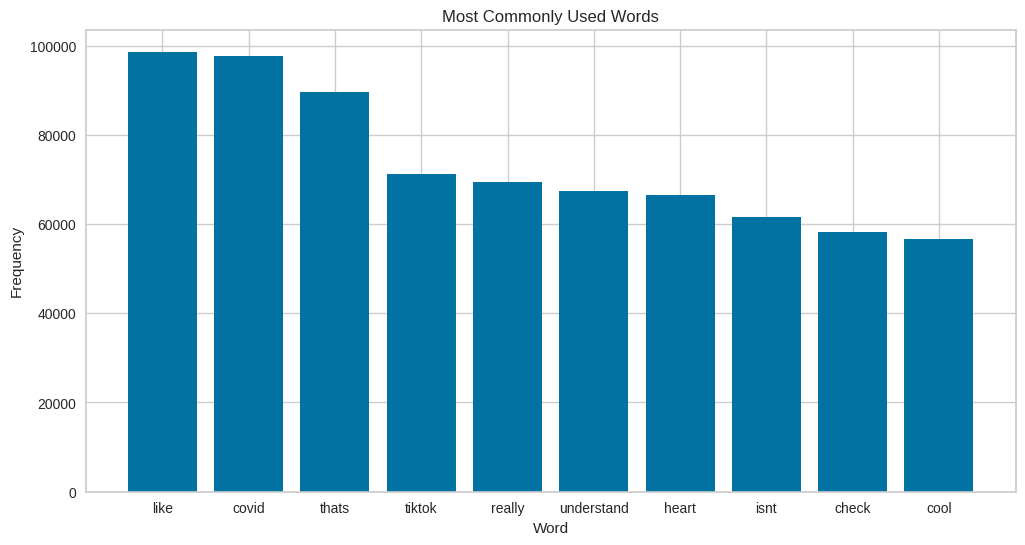

In [53]:

top_words = word_counts.most_common(10) # Change the number to show more/less words
x_values = [word[0] for word in top_words]
y_values = [word[1] for word in top_words]
plt.figure(figsize=(12, 6))
plt.bar(x_values, y_values)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Commonly Used Words')
plt.show()

Creating Classes for Tweets:

"Help": Tweets that express a need for assistance or ask for help, such as:

"We need supplies and shelter for the earthquake victims"

"Please help those affected by the earthquake by donating to relief efforts"

"News": Tweets that share information about the earthquake or its aftermath, such as:

"Magnitude 6.8 earthquake strikes Turkey and Syria"

"Rescue teams continue to search for survivors in the rubble"

"Funding": Tweets that promote or discuss fundraising efforts for earthquake relief, such as:

"Join our fundraising campaign to help those affected by the earthquake"

"Which charities are accepting donations for the earthquake relief efforts?"

"Survivor stories": Tweets that share personal accounts or experiences of the earthquake, such as:

"I was in the middle of a meeting when the earthquake hit. It was the scariest moment of my life"

"My family and I are safe, but our house was severely damaged in the earthquake"

"Volunteering": Tweets that promote or discuss volunteer efforts for earthquake relief, such as:

"We need volunteers to help with search and rescue operations in the affected areas"

"If you want to help, consider volunteering at a local shelter or distribution center"

"Political response": Tweets that discuss the government or political response to the earthquake, such as:

"The government needs to do more to support the earthquake victims and rebuild the affected areas"

"I'm disappointed in the lack of action from our elected officials regarding the earthquake relief efforts"

"Humanitarian aid": Tweets that discuss or promote humanitarian aid efforts for the earthquake, such as:

"The Red Cross is on the ground providing emergency relief to those affected by the earthquake"

"International aid organizations are stepping up to help with the earthquake recovery efforts"

Safety information: Tweets that provide information about how to stay safe during or after the earthquake, such as:

"Remember to drop, cover, and hold on during an earthquake to protect yourself from falling objects"

"Be careful of aftershocks and potential hazards like gas leaks and downed power lines"

Infrastructure damage: Tweets that describe the damage to buildings, roads, and other infrastructure caused by the earthquake, such as:

"The earthquake caused a major bridge to collapse, cutting off access to the affected area"

"Many buildings in the city center were severely damaged or destroyed by the earthquake"

Psychological impact: Tweets that discuss the emotional toll of the earthquake on survivors and first responders, such as:

"Trauma from the earthquake can have long-lasting effects on mental health. Make sure to seek support if you need it"

"The stress and exhaustion of working in earthquake relief can take a toll on first responders. Let's show them our support"

Animal rescue: Tweets that promote or discuss efforts to rescue and care for animals affected by the earthquake, such as:

"Many pets and farm animals have been separated from their owners or injured in the earthquake. Let's support animal rescue organizations"

"If you're looking for ways to help earthquake victims, consider donating to organizations that are rescuing and caring for animals"

In [54]:

# Define the classes and their corresponding keywords
classes = {
    'Help': ['help', 'assistance', 'support', 'donate'],
    'News': ['earthquake', 'magnitude', 'aftershock', 'rescue', 'recovery'],
    'Funding': ['fundraiser', 'donation', 'charity', 'fund'],
    'Survivor stories': ['survivor', 'personal account', 'experience', 'impact'],
    'Volunteering': ['volunteer', 'helping', 'aid', 'support'],
    'Political response': ['government', 'political', 'action', 'response'],
    'Humanitarian aid': ['humanitarian', 'aid', 'relief', 'support'],
    'Casualty reports': ['injury', 'death', 'fatal', 'missing', 'victims'],
    'Infrastructure damage': ['building', 'bridge', 'road', 'power', 'water', 'gas', 'telecommunications'],
    'Weather conditions': ['storm', 'rain', 'snow', 'wind', 'temperature', 'weather'],
    'Emergency services': ['ambulance', 'fire', 'police', 'emergency', 'rescue'],
    'Social media activity': ['tweet', 'post', 'share', 'social media'],
    'Prayer and condolences': ['prayer', 'thoughts', 'condolences', 'sympathy'],
    'Technical information': ['data', 'statistics', 'analysis', 'technical'],
    'International aid': ['international', 'donor', 'aid', 'relief'],
    'Business impact': ['business', 'economic', 'financial', 'impact'],
    'Personal safety': ['safety', 'evacuation', 'shelter', 'protection', 'precaution'],
    'Safety information': ['drop', 'cover', 'hold on', 'aftershocks', 'gas leaks', 'power lines'],
    'Psychological impact': ['mental health', 'trauma', 'stress', 'exhaustion', 'first responders'],
    'Animal rescue': ['animal rescue', 'pets', 'farm animals']
}

# Define a function to label each tweet based on its content
def classify_tweet(tweet_text):
    for class_name, keywords in classes.items():
        for keyword in keywords:
            if keyword in tweet_text:
                return class_name
    return 'Other'  # If no keyword matches, label as "Other"

# Add a new column to the dataframe with the class label for each tweet
data['Class'] = data['Tweet'].apply(classify_tweet)

# Save the labeled dataset to a new CSV file
data.to_csv('/content/drive/MyDrive/tweet_data_labeled.csv', index=False)


In [55]:
df = data

In [56]:
df

,Unnamed: 0,Username,Tweet_id,Date,Tweet,Language,Location,Acctdesc,Source,Replies,...,Likes,Hashtags,Following,Followers,Total_tweets,Coordinates,Url,Time,Extracted,Class
0,0,Glaceon17TTV,1639779193448812547,2023-03-25 23:59:59,flea_alex furry_fortnite i love that skin,en,"Philadelphia, Pennsylvania",Discord: Glaceon17(???)#6311\nTwitch: twitch.t...,"<a href=""http://twitter.com/download/android"" ...",0.0,...,0.0,[],289,248.0,3205.0,NaN,https://twitter.com/Glaceon17TTV/status/163977...,NaN,NaN,Other
1,1,hamblaster9k,1639779193432178689,2023-03-25 23:59:59,hodl_avax bruh httpstcoouzygyjy,en,NaN,"Developer, #Avalanche validator, @RipperzNFT, ...","<a href=""http://twitter.com/download/iphone"" r...",0.0,...,0.0,[],895,645.0,5760.0,NaN,https://twitter.com/hamblaster9k/status/163977...,NaN,NaN,Other
2,2,ChuckRuckus,1639779193432027138,2023-03-25 23:59:59,colzati hmkilla udtw og_powerstorm np man like...,en,United States,I am just a random dude on the internet that r...,"<a href=""http://twitter.com/download/android"" ...",0.0,...,1.0,[],439,75.0,46517.0,NaN,https://twitter.com/ChuckRuckus/status/1639779...,NaN,NaN,Survivor stories
3,3,Chiara_Scuro,1639779193364918277,2023-03-25 23:59:59,update i found them httpstcohmikshe,en,NaN,??Revolutionary Girl ?? Cosplayer & Designer ?...,"<a href=""http://twitter.com/download/iphone"" r...",1.0,...,9.0,[],546,1005.0,63559.0,NaN,https://twitter.com/Chiara_Scuro/status/163977...,NaN,NaN,Other
4,4,GilbertoArau,1639779193360637952,2023-03-25 23:59:59,mirrors believe all women,en,NaN,"Fan?tico de #GuildWars #GuildWars2 , Daggerfal...","<a href=""https://mobile.twitter.com"" rel=""nofo...",0.0,...,0.0,[],218,20.0,3638.0,NaN,https://twitter.com/GilbertoArau/status/163977...,NaN,NaN,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565783,37079,SvddenRezzbian,1642256940805033984,2023-04-01,i have twitter blue and i still cant spell my ...,en,CA | she/her | gæ🏳️‍🌈,【=꩜︿꩜=】・.*✧༺ Avid Rezzbian ༻✧ *.・ Psych/Soc 🫀|...,"<a href=""http://twitter.com/download/iphone"" r...",0,...,2,[],2170,4405.0,24424.0,NaN,https://twitter.com/SvddenRezzbian/status/1642...,20:05:41,2023-04-05 12:20:09.222679,Social media activity
1565784,37080,kidnamefinger29,1642256905560272898,2023-04-01,bigdaddyman schmidtlepp elonmusk not twitter blue,en,🇺🇸,#GoPackGo || arospec || he/him || metallica fa...,"<a href=""http://twitter.com/download/iphone"" r...",1,...,1,[],181,7.0,396.0,NaN,https://twitter.com/kidnamefinger29/status/164...,20:05:32,2023-04-05 12:20:09.222741,Other
1565785,37081,devascseds,1642256882168389633,2023-04-01,elonmusk i have blue tick still i am getting a...,en,"Houston, TX",DPM - Dalits prime minister party. I want make...,"<a href=""http://twitter.com/download/iphone"" r...",0,...,0,[],245,57.0,514.0,NaN,https://twitter.com/devascseds/status/16422568...,20:05:27,2023-04-05 12:20:09.222796,Other
1565786,37082,KCAZgirl,1642256775209426946,2023-04-01,hey twitter fam anyone up for helping a new te...,en,"Kansas City, MO","PROUD blue dot in a big, red sea.#VoteBlue #Te...","<a href=""http://twitter.com/download/iphone"" r...",1,...,0,[],13101,12055.0,33372.0,NaN,https://twitter.com/KCAZgirl/status/1642256775...,20:05:01,2023-04-05 12:20:09.222920,Help


Creating a bar plot of the class distribution

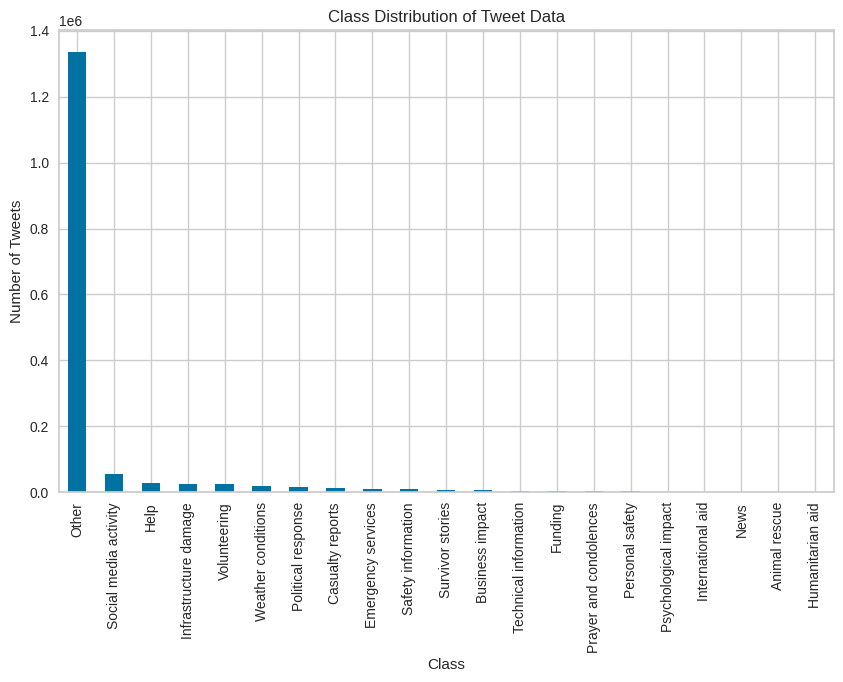

In [57]:

plt.figure(figsize=(10, 6))
class_counts = df['Class'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution of Tweet Data')
plt.xlabel('Class')
plt.ylabel('Number of Tweets')
plt.show()


In [58]:
df.columns

Index(['Unnamed: 0', 'Username', 'Tweet_id', 'Date', 'Tweet', 'Language',
       'Location', 'Acctdesc', 'Source', 'Replies', 'Retweets', 'Likes',
       'Hashtags', 'Following', 'Followers', 'Total_tweets', 'Coordinates',
       'Url', 'Time', 'Extracted', 'Class'],
      dtype='object')

In [59]:
df['Tweet'].isna().sum()

0

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Tweet'])
y = df['Class']

Simple Prediction of Classes

In [61]:

# Sample input tweet
input_tweet = "our community aimed to donate a ransom amount of food and neccessities, please amplify." #naturaldisaster #safetyfirst

# Classify the tweet
predicted_class = classify_tweet(input_tweet)

# Print the predicted class
print('Predicted class:', predicted_class)

Predicted class: Help


In [62]:
df 

,Unnamed: 0,Username,Tweet_id,Date,Tweet,Language,Location,Acctdesc,Source,Replies,...,Likes,Hashtags,Following,Followers,Total_tweets,Coordinates,Url,Time,Extracted,Class
0,0,Glaceon17TTV,1639779193448812547,2023-03-25 23:59:59,flea_alex furry_fortnite i love that skin,en,"Philadelphia, Pennsylvania",Discord: Glaceon17(???)#6311\nTwitch: twitch.t...,"<a href=""http://twitter.com/download/android"" ...",0.0,...,0.0,[],289,248.0,3205.0,NaN,https://twitter.com/Glaceon17TTV/status/163977...,NaN,NaN,Other
1,1,hamblaster9k,1639779193432178689,2023-03-25 23:59:59,hodl_avax bruh httpstcoouzygyjy,en,NaN,"Developer, #Avalanche validator, @RipperzNFT, ...","<a href=""http://twitter.com/download/iphone"" r...",0.0,...,0.0,[],895,645.0,5760.0,NaN,https://twitter.com/hamblaster9k/status/163977...,NaN,NaN,Other
2,2,ChuckRuckus,1639779193432027138,2023-03-25 23:59:59,colzati hmkilla udtw og_powerstorm np man like...,en,United States,I am just a random dude on the internet that r...,"<a href=""http://twitter.com/download/android"" ...",0.0,...,1.0,[],439,75.0,46517.0,NaN,https://twitter.com/ChuckRuckus/status/1639779...,NaN,NaN,Survivor stories
3,3,Chiara_Scuro,1639779193364918277,2023-03-25 23:59:59,update i found them httpstcohmikshe,en,NaN,??Revolutionary Girl ?? Cosplayer & Designer ?...,"<a href=""http://twitter.com/download/iphone"" r...",1.0,...,9.0,[],546,1005.0,63559.0,NaN,https://twitter.com/Chiara_Scuro/status/163977...,NaN,NaN,Other
4,4,GilbertoArau,1639779193360637952,2023-03-25 23:59:59,mirrors believe all women,en,NaN,"Fan?tico de #GuildWars #GuildWars2 , Daggerfal...","<a href=""https://mobile.twitter.com"" rel=""nofo...",0.0,...,0.0,[],218,20.0,3638.0,NaN,https://twitter.com/GilbertoArau/status/163977...,NaN,NaN,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565783,37079,SvddenRezzbian,1642256940805033984,2023-04-01,i have twitter blue and i still cant spell my ...,en,CA | she/her | gæ🏳️‍🌈,【=꩜︿꩜=】・.*✧༺ Avid Rezzbian ༻✧ *.・ Psych/Soc 🫀|...,"<a href=""http://twitter.com/download/iphone"" r...",0,...,2,[],2170,4405.0,24424.0,NaN,https://twitter.com/SvddenRezzbian/status/1642...,20:05:41,2023-04-05 12:20:09.222679,Social media activity
1565784,37080,kidnamefinger29,1642256905560272898,2023-04-01,bigdaddyman schmidtlepp elonmusk not twitter blue,en,🇺🇸,#GoPackGo || arospec || he/him || metallica fa...,"<a href=""http://twitter.com/download/iphone"" r...",1,...,1,[],181,7.0,396.0,NaN,https://twitter.com/kidnamefinger29/status/164...,20:05:32,2023-04-05 12:20:09.222741,Other
1565785,37081,devascseds,1642256882168389633,2023-04-01,elonmusk i have blue tick still i am getting a...,en,"Houston, TX",DPM - Dalits prime minister party. I want make...,"<a href=""http://twitter.com/download/iphone"" r...",0,...,0,[],245,57.0,514.0,NaN,https://twitter.com/devascseds/status/16422568...,20:05:27,2023-04-05 12:20:09.222796,Other
1565786,37082,KCAZgirl,1642256775209426946,2023-04-01,hey twitter fam anyone up for helping a new te...,en,"Kansas City, MO","PROUD blue dot in a big, red sea.#VoteBlue #Te...","<a href=""http://twitter.com/download/iphone"" r...",1,...,0,[],13101,12055.0,33372.0,NaN,https://twitter.com/KCAZgirl/status/1642256775...,20:05:01,2023-04-05 12:20:09.222920,Help


In [64]:
df = df.drop('Unnamed: 0', axis=1)


In [65]:
df

,Username,Tweet_id,Date,Tweet,Language,Location,Acctdesc,Source,Replies,Retweets,Likes,Hashtags,Following,Followers,Total_tweets,Coordinates,Url,Time,Extracted,Class
0,Glaceon17TTV,1639779193448812547,2023-03-25 23:59:59,flea_alex furry_fortnite i love that skin,en,"Philadelphia, Pennsylvania",Discord: Glaceon17(???)#6311\nTwitch: twitch.t...,"<a href=""http://twitter.com/download/android"" ...",0.0,0.0,0.0,[],289,248.0,3205.0,NaN,https://twitter.com/Glaceon17TTV/status/163977...,NaN,NaN,Other
1,hamblaster9k,1639779193432178689,2023-03-25 23:59:59,hodl_avax bruh httpstcoouzygyjy,en,NaN,"Developer, #Avalanche validator, @RipperzNFT, ...","<a href=""http://twitter.com/download/iphone"" r...",0.0,0.0,0.0,[],895,645.0,5760.0,NaN,https://twitter.com/hamblaster9k/status/163977...,NaN,NaN,Other
2,ChuckRuckus,1639779193432027138,2023-03-25 23:59:59,colzati hmkilla udtw og_powerstorm np man like...,en,United States,I am just a random dude on the internet that r...,"<a href=""http://twitter.com/download/android"" ...",0.0,0.0,1.0,[],439,75.0,46517.0,NaN,https://twitter.com/ChuckRuckus/status/1639779...,NaN,NaN,Survivor stories
3,Chiara_Scuro,1639779193364918277,2023-03-25 23:59:59,update i found them httpstcohmikshe,en,NaN,??Revolutionary Girl ?? Cosplayer & Designer ?...,"<a href=""http://twitter.com/download/iphone"" r...",1.0,0.0,9.0,[],546,1005.0,63559.0,NaN,https://twitter.com/Chiara_Scuro/status/163977...,NaN,NaN,Other
4,GilbertoArau,1639779193360637952,2023-03-25 23:59:59,mirrors believe all women,en,NaN,"Fan?tico de #GuildWars #GuildWars2 , Daggerfal...","<a href=""https://mobile.twitter.com"" rel=""nofo...",0.0,0.0,0.0,[],218,20.0,3638.0,NaN,https://twitter.com/GilbertoArau/status/163977...,NaN,NaN,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565783,SvddenRezzbian,1642256940805033984,2023-04-01,i have twitter blue and i still cant spell my ...,en,CA | she/her | gæ🏳️‍🌈,【=꩜︿꩜=】・.*✧༺ Avid Rezzbian ༻✧ *.・ Psych/Soc 🫀|...,"<a href=""http://twitter.com/download/iphone"" r...",0,0,2,[],2170,4405.0,24424.0,NaN,https://twitter.com/SvddenRezzbian/status/1642...,20:05:41,2023-04-05 12:20:09.222679,Social media activity
1565784,kidnamefinger29,1642256905560272898,2023-04-01,bigdaddyman schmidtlepp elonmusk not twitter blue,en,🇺🇸,#GoPackGo || arospec || he/him || metallica fa...,"<a href=""http://twitter.com/download/iphone"" r...",1,0,1,[],181,7.0,396.0,NaN,https://twitter.com/kidnamefinger29/status/164...,20:05:32,2023-04-05 12:20:09.222741,Other
1565785,devascseds,1642256882168389633,2023-04-01,elonmusk i have blue tick still i am getting a...,en,"Houston, TX",DPM - Dalits prime minister party. I want make...,"<a href=""http://twitter.com/download/iphone"" r...",0,0,0,[],245,57.0,514.0,NaN,https://twitter.com/devascseds/status/16422568...,20:05:27,2023-04-05 12:20:09.222796,Other
1565786,KCAZgirl,1642256775209426946,2023-04-01,hey twitter fam anyone up for helping a new te...,en,"Kansas City, MO","PROUD blue dot in a big, red sea.#VoteBlue #Te...","<a href=""http://twitter.com/download/iphone"" r...",1,2,0,[],13101,12055.0,33372.0,NaN,https://twitter.com/KCAZgirl/status/1642256775...,20:05:01,2023-04-05 12:20:09.222920,Help


In [67]:
df.to_csv('/content/drive/MyDrive/tweet_data_labeled1.csv', index=False)
